## Independent Data Exploration

This is the independent exploration project for Data 8. Please refer to Piazza and the Policies page for details on the project. Enter all of your code cells here for submission! You can either use this notebook directly or add the contents of this notebook to your own project notebook named `exploration.ipynb`. The following cell is required to submit.

In [10]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from datetime import datetime, timezone

from client.api.notebook import Notebook
ok = Notebook('exploration.ok')
_ = ok.auth(inline=True)

Assignment: Independent Data Exploration
OK, version v1.12.5

Successfully logged in as yashswarup@berkeley.edu


## 1. Independent Data Exploration

We downloaded a Bitcoin Historical Dataset from https://www.kaggle.com/mczielinski/bitcoin-historical-data to analyse the increase in price rate from January 1,2012 to October 19, 2017. The original dataset was at 1-minute intervals but we made modified it to 1-day intervals. We have one row for each day from January 1, 2012 to October 19, 2017. 

Downloaded the modified dataset from a file called bitcoin.csv

In [2]:
bitcoin = Table.read_table('bitcoin.csv')
bitcoin

Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1325376000,4.58,4.58,4.58,4.58,9,41.22,4.58
1325462400,5,5,5,5,10.1,50.5,5
1325548800,5,5,5,5,19.048,95.24,5
1325635200,5.29,5.29,5.29,5.29,4.01081,21.2172,5.29
1325721600,5.37,5.57,5.37,5.57,43.3122,235.747,5.44297
1325808000,6.65,6.65,6.65,6.65,0.499266,3.32012,6.65
1325894400,6,6,6,6,1,6,6
1325980800,6.8,6.8,6.8,6.8,0.295858,2.01183,6.8
1326067200,7,7,7,7,1,7,7
1326153600,6.3,6.3,6.3,6.3,1,6.3,6.3


Since the data set contains timestamps instead of human dates, we extracted the Timestamp to a new table called timestamp_table, to convert the timestamps into the year they represent.

In [4]:
timestamp_table = bitcoin.select('Timestamp')

Defined a function that converts timestamps to years for our data.

In [5]:
def convert_to_year(timestamp):
    if timestamp < 1356998400 :
        return 2012
    elif timestamp < 1388534400:
        return 2013
    elif timestamp < 1420070400:
        return 2014
    elif timestamp < 1451606400:
        return 2015
    elif timestamp < 1483228800:
        return 2016
    else:
        return 2017

In [6]:
timestamp_table = timestamp_table.with_column('Year', timestamp_table.apply(convert_to_year, 'Timestamp'))
timestamp_table

Timestamp,Year
1325376000,2012
1325462400,2012
1325548800,2012
1325635200,2012
1325721600,2012
1325808000,2012
1325894400,2012
1325980800,2012
1326067200,2012
1326153600,2012


We joined the timestamp table to the orignal bitcoin table.

In [7]:
bitcoin = bitcoin.join('Timestamp', timestamp_table)
bitcoin

Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year
1325376000,4.58,4.58,4.58,4.58,9,41.22,4.58,2012
1325462400,5,5,5,5,10.1,50.5,5,2012
1325548800,5,5,5,5,19.048,95.24,5,2012
1325635200,5.29,5.29,5.29,5.29,4.01081,21.2172,5.29,2012
1325721600,5.37,5.57,5.37,5.57,43.3122,235.747,5.44297,2012
1325808000,6.65,6.65,6.65,6.65,0.499266,3.32012,6.65,2012
1325894400,6,6,6,6,1,6,6,2012
1325980800,6.8,6.8,6.8,6.8,0.295858,2.01183,6.8,2012
1326067200,7,7,7,7,1,7,7,2012
1326153600,6.3,6.3,6.3,6.3,1,6.3,6.3,2012


Now we have a table with another categorical variable, the year of the price. We can now further use the year to visualize the average close price of bitcoins through the years.

We grouped the data in the new bitcoin table by selecting the columns, Year and Close and grouping according to Year and averaging the Close prices. This helped us in visualizing the data in the form of a line plot which shows the trend in the average close price through the years. 

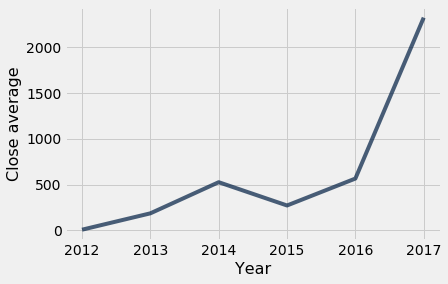

In [8]:
bitcoin.select("Year","Close").group("Year", np.average).sort("Year",descending = True).plot("Year")

**Conclusion:** By eyeballing this data we can depict the increase of bitcoin prices 2012 through 2017. The increase in prices as we can see has been extremely high with just a slight dip in 2014 to 2015. Thus we visualized a categorical variable. Since, the prices are mostly increasing throughout the year we decided to use growth rate as a test statistic for our hypothesis.

## Impact of Introduction of Ethereum on the Price of Bitcoin

We decided to test the impact of  the introduction of a new cryptocurrency, ethereum on the price of bitcoin. Ethereum was introduced on July 30, 2015. We seperated the data into two tables, prices before the launch of ethereum and prices after the launch of ethereum.

In [9]:
bitcoin_before_ethereum = bitcoin.where('Timestamp', are.below(1438257600))
bitcoin_after_ethereum = bitcoin.where('Timestamp', are.above_or_equal_to(1438257600))

To visualize a quantitative variable we scatter plotted the close prices of bitcoin with respect to the date.

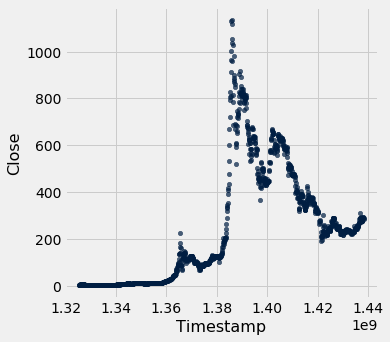

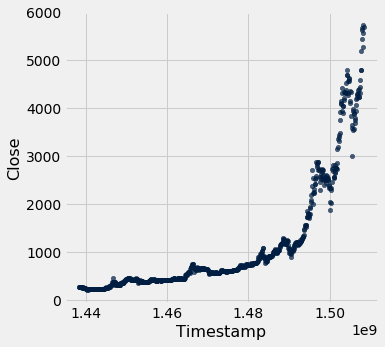

In [112]:
bitcoin_before_ethereum.scatter(0, 4)
bitcoin_after_ethereum.scatter(0, 4)

The first graph shows the trend of bitcoin close prices before the launch of ethereum and the second graph shows the the trend of bitcoin close prices after the launch of ethereum.

**We then decided to perform a hypotheses test:**


**Null hypotheses:** There was no impact on the prices of bitcoin due to the introduction of ethereum and the change is only due to chance variation.

**Alternative hypotheses:** The introduction of ethereum impacted bitcoin prices.

**Test Statistic:** The difference in monthly growth rates calculated over a period of sixty days before and after the launch of ethereum.

In [113]:
def growth_rate(after, before, t):
    return ((after/before)**(1/t))-1

We randomly sampled one day and calculated the growth rate of the period of thirty days before that date and thirty days after that date, a thousand times over. We stored all the growth rates in an array called be_growth_rates.

In [114]:
be_growth_rates = make_array()
for i in np.arange(1000):
    sample = bitcoin_before_ethereum.take(np.arange(30, 1273)).sample(1)
    current_timestamp = sample.column(0).item(0)
    future_timestamp = current_timestamp + 2592000
    before_timestamp = current_timestamp - 2592000
    current_close = sample.column(4).item(0)
    future_close = bitcoin_before_ethereum.where('Timestamp', future_timestamp).column(4)
    before_close = bitcoin_before_ethereum.where('Timestamp', before_timestamp).column(4)
    rate = growth_rate(future_close, before_close, 2)
    be_growth_rates = np.append(be_growth_rates, rate)
be_growth_rates

array([  1.56113329e+00,  -4.05219915e-02,   3.10150949e-02,
        -1.32845157e-01,   1.96339113e-01,   1.06129046e-01,
        -1.43403146e-01,  -2.31874901e-02,  -8.64007789e-02,
         5.70174293e-02,  -1.04149694e-01,  -1.19383507e-02,
         1.75796474e+00,   2.28270334e-01,  -1.65403388e-01,
         1.02773388e+00,   1.04055819e-01,   1.32274669e+00,
        -1.27702886e-01,   1.04754012e-01,   3.72770174e-02,
         2.06017752e+00,  -2.71801137e-02,  -3.82112546e-02,
         1.00777776e-01,  -6.48251654e-02,  -6.89090307e-02,
         2.05005039e+00,  -1.92821851e-02,   5.91736116e-02,
         1.54418693e+00,  -2.12252557e-02,   7.78518942e-02,
         4.16147751e-01,  -1.24127095e-01,  -2.22347701e-02,
         1.53247536e-01,  -1.55823678e-01,  -1.44053730e-01,
         9.19623812e-01,   9.87654562e-04,   2.40491788e-01,
        -1.31359484e-01,  -1.52584667e-02,   1.62490155e+00,
         2.05577502e-03,   7.01808401e-02,   1.56113329e+00,
         3.01876296e-01,

In the next cell, we have plotted the distibution of the growth rates before the launch of ethereum.

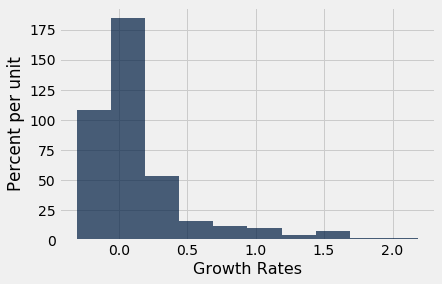

In [115]:
plot = Table().with_column('Growth Rates', be_growth_rates)
plot.hist()

Again, we randomly sampled one day and calculated the growth rate of the period of thirty days before that date and thirty days after that date, a thousand times over. We stored all the growth rates in an array called ae_growth_rates.

In [116]:
ae_growth_rates = make_array()
for i in np.arange(1000):
    sample = bitcoin_after_ethereum.take(np.arange(30, 773)).sample(1)
    current_timestamp = sample.column(0).item(0)
    future_timestamp = 2592000 + current_timestamp
    before_timestamp = current_timestamp - 2592000
    current_close = sample.column(4).item(0)
    future_close = bitcoin_after_ethereum.where('Timestamp', future_timestamp).column(4)
    before_close = bitcoin_after_ethereum.where('Timestamp', before_timestamp).column(4)
    rate = growth_rate(future_close, before_close, 2)
    ae_growth_rates = np.append(ae_growth_rates, rate)
ae_growth_rates

array([  1.09738726e-01,   2.44029538e-01,  -8.83907344e-02,
         9.67303734e-02,  -5.04125427e-02,   2.70269804e-01,
         2.60848461e-02,  -1.23756941e-01,   1.22158043e-01,
         1.07589794e-01,   1.38689825e-01,  -8.49479599e-02,
        -8.05044376e-02,   1.57743721e-01,   2.29936946e-01,
         2.36415287e-01,   5.03594083e-01,  -2.61224410e-02,
         4.62485393e-02,   6.41952712e-02,   4.32912524e-02,
         3.05758687e-01,   2.12330987e-01,   3.82232278e-02,
         5.28854667e-02,   5.17758207e-02,   5.31623483e-02,
        -4.00437095e-02,   1.60308726e-01,  -7.49010818e-02,
         7.54005737e-02,   1.77415475e-01,   5.98166841e-02,
         1.05010767e-02,   1.90885830e-01,   1.61263096e-02,
         3.48953082e-01,   1.94245237e-02,   3.63993118e-01,
         1.85416267e-01,   1.77415475e-01,   3.18813544e-01,
         2.70554782e-01,   4.07360512e-03,   1.05010767e-02,
         2.41157270e-01,  -6.58506575e-03,   2.24314359e-01,
         5.59786958e-02,

In the next cell, we have plotted the distibution of the growth rates after the launch of ethereum.

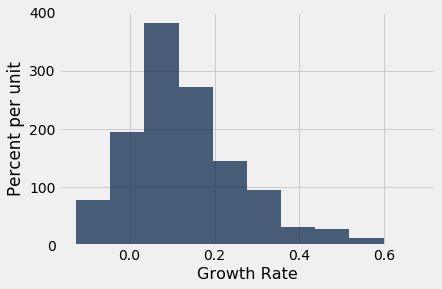

In [123]:
plot1 = Table().with_column('Growth Rate', ae_growth_rates)
plot1.hist()

The test statistic is the difference in growth rates before the introduction of ethereum and after the introduction of ethereum. We calculated it by randomly sampling one growth rate from before the launch of ethereum and one growth rate after the launch of ethereum and stored their difference in an array called difference_in_rates

In [124]:
difference_in_rates = make_array()
for i in np.arange(1000):
    sample = bitcoin_before_ethereum.take(np.arange(30, 1273)).sample(1)
    current_timestamp = sample.column(0).item(0)
    future_timestamp = current_timestamp + 2592000
    before_timestamp = current_timestamp - 2592000
    future_close = bitcoin_before_ethereum.where('Timestamp', future_timestamp).column(4)
    before_close = bitcoin_before_ethereum.where('Timestamp', before_timestamp).column(4)
    be_rate = growth_rate(future_close, before_close, 2)
    sample1 = bitcoin_after_ethereum.take(np.arange(30, 773)).sample(1)
    current_timestamp1 = sample1.column(0).item(0)
    future_timestamp1 = current_timestamp1 + 2592000
    before_timestamp1 = current_timestamp1 - 2592000
    future_close1 = bitcoin_after_ethereum.where('Timestamp', future_timestamp1).column(4)
    before_close1 = bitcoin_after_ethereum.where('Timestamp', before_timestamp1).column(4)
    ae_rate = growth_rate(future_close1, before_close1, 2)
    difference_in_rates = np.append(difference_in_rates, be_rate - ae_rate)
difference_in_rates

array([  9.94505960e-01,  -1.51711473e-01,  -3.86641924e-01,
         1.76977537e-01,  -2.28772581e-02,   1.12635261e-02,
         8.46058987e-01,  -1.80711383e-01,   8.56008636e-02,
        -2.45136912e-01,   8.66360135e-01,  -4.30658706e-02,
        -1.84829189e-01,  -6.40164038e-02,  -6.20770983e-02,
        -2.57604071e-01,   6.85284493e-01,  -1.48818403e-01,
         3.04938469e-02,  -1.00250509e-01,   3.13462739e-02,
         1.51072552e+00,  -4.10989671e-01,  -1.61514950e-02,
         1.82933549e+00,  -1.49826885e-01,   9.33271302e-02,
        -9.76759215e-03,   1.88860443e-02,  -1.06588980e-01,
         1.57587323e-01,  -4.02046153e-01,  -7.43148666e-03,
        -6.34291648e-01,   2.40875027e-01,  -1.02570389e-01,
        -3.73421785e-01,  -3.15101983e-01,  -1.74823270e-01,
         2.15936896e-01,  -2.37613063e-02,  -1.75292992e-01,
        -1.13592367e-01,  -7.09743280e-02,  -5.43731953e-02,
        -6.06871203e-03,   3.06159436e-01,   9.22606300e-01,
        -2.14190247e-01,

We can now visualize the probability distibution of the test statistic, under the null hypothesis.

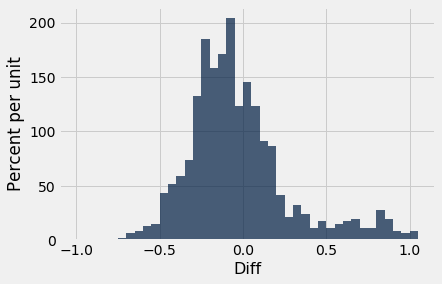

In [125]:
diff_in_rates = Table().with_column('Diff', difference_in_rates).hist(bins = np.arange(-1, 1.1, 0.05))

Considering a 5% P-Value Cutoff, we now form a 95% Confidence Interval.

In [126]:
lower_range = percentile(2.5, difference_in_rates)

In [127]:
upper_range = percentile(97.5, difference_in_rates)

In [128]:
print ('Our Confidence Interval: (', lower_range, ',',upper_range , ')' )

Our Confidence Interval: ( -0.493405604115 , 1.24323718962 )


**Conclusion:** Since our 95% Confidence Interval contains the value, 0, i.e, that the difference in the growth rates before and after the launch of ethereum, we fail to reject our null hypothesis. Thus, it seems introduction of ethereum did not have an impact on prices of bitcoin. 

## Prediction of Price of Bitcoin

We have plotted the price of bitcoin through the years 2012 to 2017 to visualize the variation of the closing price.

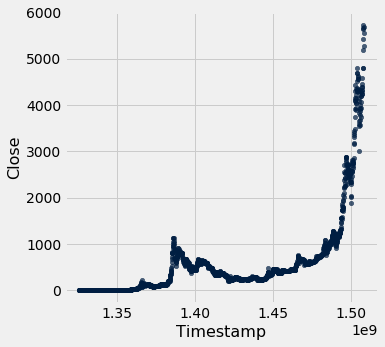

In [129]:
bitcoin.scatter(0,4)

To predict the future price of bitcoins, we choose a Non-linear Regression Technique as we can see from the curve above, that the association is not linear.

We made a best fit line (exponential curve) which could help us predict the future price of bitcoins. We have taken the entire data since we had failed to reject our null and the data seemed consistent with our null.

To make the best fit line, we try and minimize the mean squared error. The function bitcoin_mse takes the slope and the intercept and returns the mean squared error of our predicted values.

In [130]:
def bitcoin_mse(a,b):
    x = bitcoin.column('Timestamp')
    y = bitcoin.column('Close')
    fitted = a**(x) + b 
    return np.mean((y - fitted)**2)

In [131]:
best = minimize(bitcoin_mse)
best

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
/srv/app/venv/lib/python3.6/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/srv/app/venv/lib/python3.6/site-packages/scipy/optimize/optimize.py:1855: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)


array([  1.00000001e+00,  -1.59927323e+03])

In [132]:
x = bitcoin.column('Timestamp')
bitcoin_fit = best.item(0)**(x) + best.item(1)

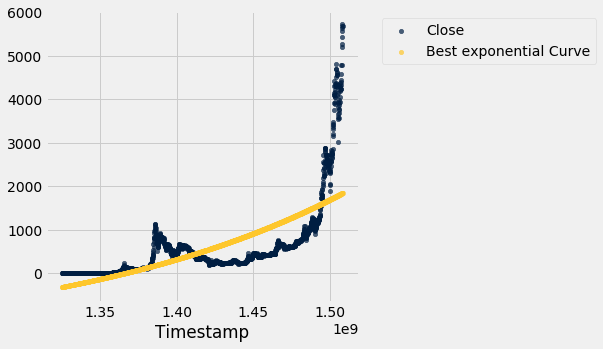

In [133]:
bitcoin.select(0,4).with_columns('Best exponential Curve', bitcoin_fit).scatter(0)

After trying a couple of different lines, we reached the conclusion that an exponential curve would be our best fit line. Though, we think that this might not be so accurate due to a lot of confounding factors affecting the price.

Now, we'll quantitatively evaluate our prediction technique by plotting residuals.

In [134]:
def residual(table, x, y):
    residuals = table.column(y) - bitcoin_fit
    x_array = table.column(x)
    t = Table().with_column(
        x, x_array,
        'residuals', residuals)
    t.scatter(x, 'residuals', color = 'r')

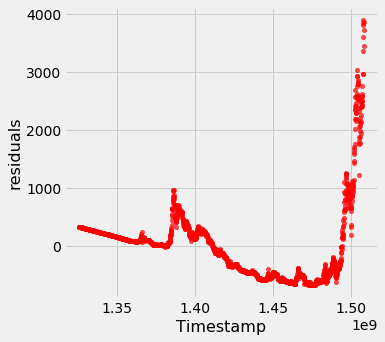

In [135]:
residual(bitcoin, 'Timestamp','Close')

Since, the residual plot shows a trend and is not uniformly distibuted around zero, this is not a good prediction technique. We think it is very hard to predict bitcoin prices as there are a lot of confounding factors.

## 2. Submission

Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

In [136]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'exploration.ipynb'.
Submit... 100% complete
Submission successful for user: yashswarup@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/exploration/submissions/vgjBwV

